## **Load and visualize an image**

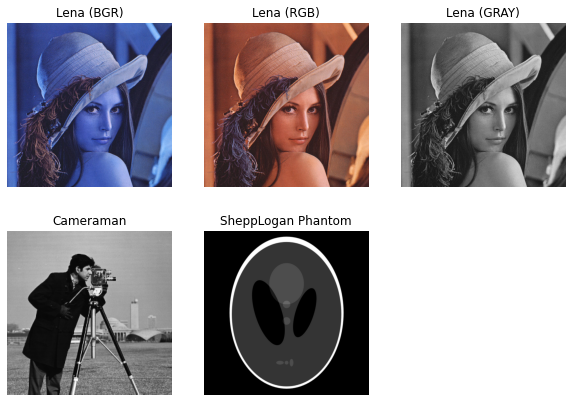

In [138]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read images into the workspace
lena = cv2.imread('lena.bmp') # BGR image
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # RGB image
lena_gs = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # GS image

# lena_gs = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE) 
cameraman = cv2.imread('cameraman.tif')
sp_phantom = cv2.imread('SheppLogan_Phantom.png')

# Plot rgb/grayscale images
plt.figure(figsize=(10, 7))
plt.subplot(2,3,1), plt.imshow(lena), plt.title('Lena (BGR)'), plt.axis('off')
plt.subplot(2,3,2), plt.imshow(lena_rgb), plt.title('Lena (RGB)'), plt.axis('off')
plt.subplot(2,3,3), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.title('Lena (GRAY)'), plt.axis('off')
plt.subplot(2,3,4), plt.imshow(cameraman), plt.title('Cameraman'), plt.axis('off')
plt.subplot(2,3,5), plt.imshow(sp_phantom), plt.title('SheppLogan Phantom'), plt.axis('off')
plt.show()

In [ ]:
# Print images properties
print('"Lena" image Information\n')
print("Number of Pixels: " + str(lena_rgb.size))
print("Image (RGB) shape: " + str(lena_rgb.shape))
print("Image (GRAY) shape: " + str(lena_gs.shape))
print("Image type:  " + str(type(lena_rgb)))

# Save image shape
(height, width, channels) = lena_rgb.shape

"Lena" image Information

Number of Pixels: 786432
Image (RGB) shape: (512, 512, 3)
Image (GRAY) shape: (512, 512)
Image type:  <class 'numpy.ndarray'>


## **Image histogram**


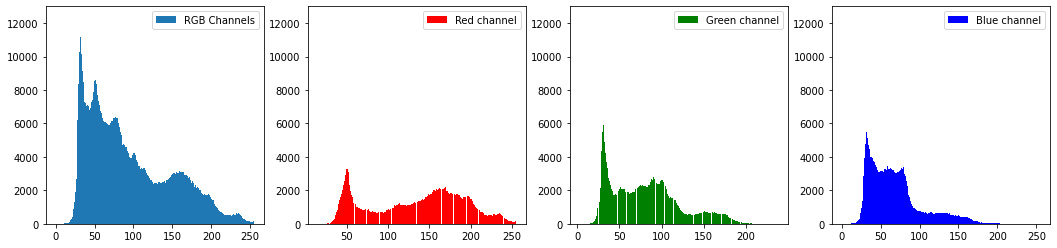

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb.flatten(), bins = 256)
_ = plt.legend(['RGB Channels'])
plt.subplot(1,4,2), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb[:, :, 0].flatten(), bins = 256, color = 'r')
_ = plt.legend(['Red channel'])
plt.subplot(1,4,3), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb[:, :, 1].flatten(), bins = 256, color = 'g')
_ = plt.legend(['Green channel'])
plt.subplot(1,4,4), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb[:, :, 2].flatten(), bins = 256, color = 'b')
_ = plt.legend(['Blue channel'])

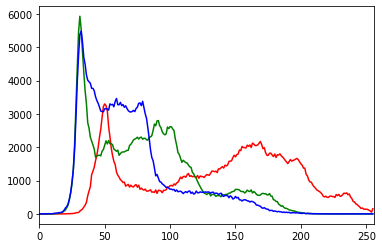

In [ ]:
# Image histogram using OpenCV 
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist
color = ('r','g','b')
for i, col in enumerate(color):
    hist = cv2.calcHist([lena_rgb], [i], None, [256], [0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])

## **Split and Merge Image Channels**

In [ ]:
blue_ch, green_ch, red_ch = cv2.split(lena)
print("Blue channel shape: " + str(blue_ch.shape))
print("Green channel shape: " + str(green_ch.shape))
print("Red channel shape: " + str(red_ch.shape))

Blue channel shape: (512, 512)
Green channel shape: (512, 512)
Red channel shape: (512, 512)


In [ ]:
zeros = np.zeros(blue_ch.shape, np.uint8)
lena_blue = cv2.merge((blue_ch, zeros, zeros))
lena_green = cv2.merge((zeros, green_ch, zeros))
lena_red = cv2.merge((zeros, zeros, red_ch))
print("lena_blue shape: " + str(lena_blue.shape))
print("lena_green shape: " + str(lena_green.shape))
print("lena_red shape: " + str(lena_red.shape))

lena_blue shape: (512, 512, 3)
lena_green shape: (512, 512, 3)
lena_red shape: (512, 512, 3)


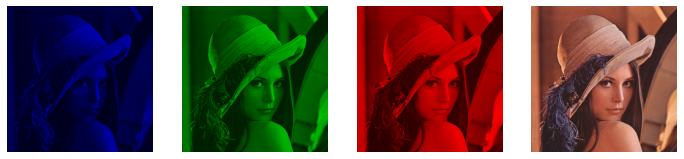

In [ ]:
# Plot all images
images = [lena_blue, lena_green, lena_red, lena]
fig, ax = plt.subplots(nrows = 1, ncols = len(images), figsize = (3*len(images), 3*len(images)))
for i, p in enumerate(images):
  ax[i].imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))
  ax[i].axis('off')
plt.show()

##Image Thresholding





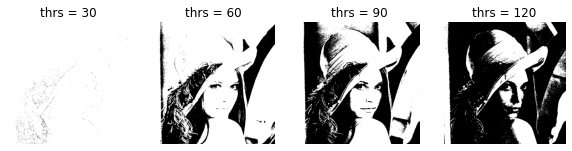

In [ ]:
thresholds = [30, 60, 90, 120]

images = []

for value in thresholds:

  x = np.where(lena_gs < value, 0, 255)

  images.append(x)


plt.figure(figsize=(10,5))

for i, p in enumerate(images):

  plt.subplot(1,len(thresholds),i+1), plt.imshow(p, cmap=plt.cm.gray), plt.axis('off'),
  plt.title(f'thrs = {thresholds[i]}')

plt.show()

## **Image rotation**

In [ ]:
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
print(f"Rotation matrix (90 deg):\n{rotation_matrix}")

Rotation matrix (90 deg):
[[ 6.12323400e-17  1.00000000e+00 -2.84217094e-14]
 [-1.00000000e+00  6.12323400e-17  5.12000000e+02]]


In [ ]:
lena_rotated = cv2.warpAffine(lena, rotation_matrix, (width, height)) # define output size

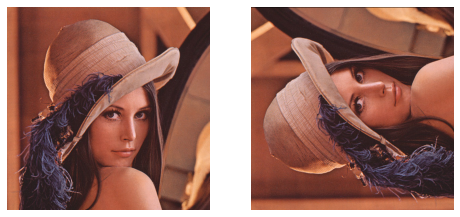

In [ ]:
# Plot images
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(lena_rotated, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

In [ ]:
# Rotate by 45 degrees and set scale to 0.5
rotation_scaling_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 0.5)
lena_rotated_scaled = cv2.warpAffine(lena, rotation_scaling_matrix, (width, height))
print(f"Rotation matrix (45 deg) + scaling:\n{rotation_scaling_matrix}")

Rotation matrix (45 deg) + scaling:
[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]


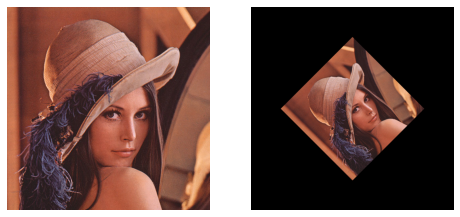

In [ ]:
# Plot images
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(lena_rotated_scaled, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

## **Image Resizing and Cropping**

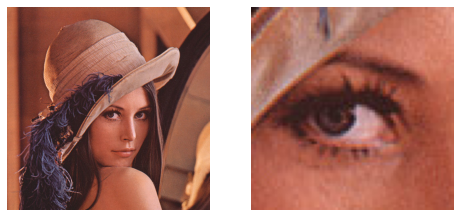

In [ ]:
startRow = int(height * .45)
startCol = int(width  * .45)
endRow   = int(height * .60)
endCol   = int(width  * .60)

# Crop image
lena_cropped = lena[startRow:endRow, startCol:endCol]

# Plot images
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(lena_cropped, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

In [ ]:
lena_resized = cv2.resize(lena, (300, 200))
print("Original image (shape): " + str(lena.shape))
print("Scaled image (shape):  " + str(lena_resized.shape))

Original image (shape): (512, 512, 3)
Scaled image (shape):  (200, 300, 3)


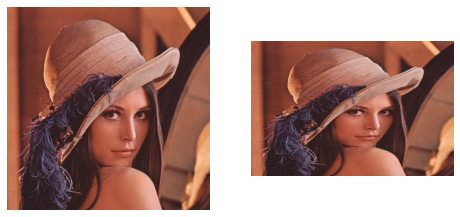

In [ ]:
# Plot images
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(lena_resized, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

#Box Blur (box linear filter)



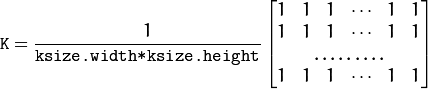

In [ ]:
def box_filter(kernel_size):

  filter = np.ones((kernel_size, kernel_size))

  return filter / (kernel_size * kernel_size)


In [152]:
def conv_2d(image, kernel):

  image = np.asarray(image, dtype=np.float32)

  f = kernel.shape[0]

  padding_size = (f - 1) // 2

  padded_image = np.pad(image, (padding_size, padding_size))

  kernel = np.flipud(np.fliplr(kernel))

  output = np.zeros_like(image)

  for i in range(image.shape[0]):

    for j in range(image.shape[1]):

      output[i][j] = (padded_image[i : i + f, j : j + f] * kernel).sum()

  return output

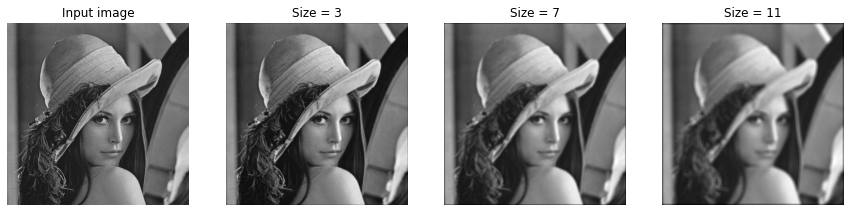

In [153]:
lena_box3 = conv_2d(lena_gs, box_filter(3))
lena_box7 = conv_2d(lena_gs, box_filter(7))
lena_box11 = conv_2d(lena_gs, box_filter(11))
plt.figure(figsize=(15,10))
plt.subplot(1, 4, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image')
plt.subplot(1, 4, 2), plt.imshow(lena_box3, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 3')
plt.subplot(1, 4, 3), plt.imshow(lena_box7, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 7')
plt.subplot(1, 4, 4), plt.imshow(lena_box11, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 11')
plt.show()

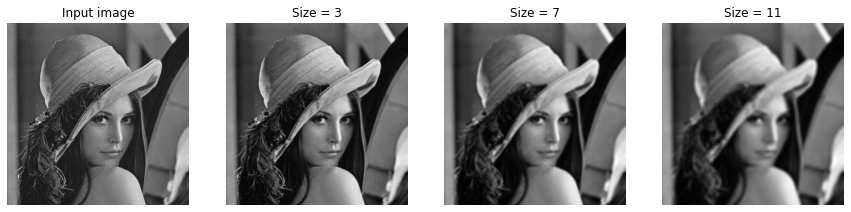

In [154]:
lena_box3_cv = cv2.blur(np.asarray(lena_gs, dtype=np.float32), (3,3))
lena_box7_cv = cv2.blur(np.asarray(lena_gs, dtype=np.float32), (7,7))
lena_box11_cv = cv2.blur(np.asarray(lena_gs, dtype=np.float32), (11,11))
plt.figure(figsize=(15,10))
plt.subplot(1, 4, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image')
plt.subplot(1, 4, 2), plt.imshow(lena_box3_cv, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 3')
plt.subplot(1, 4, 3), plt.imshow(lena_box7_cv, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 7')
plt.subplot(1, 4, 4), plt.imshow(lena_box11_cv, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 11')
plt.show()

In [155]:
print("Results checking...")
print("Difference between output images (3x3 kernel): " + str(np.abs(lena_box3 - lena_box3_cv).sum()))
print("Difference between output images (7x7 kernel): " + str(np.abs(lena_box7 - lena_box7_cv).sum()))
print("Difference between output images (11x11 kernel): " + str(np.abs(lena_box11 - lena_box11_cv).sum()))

Results checking...
Difference between output images (3x3 kernel): 72894.77
Difference between output images (7x7 kernel): 187619.77
Difference between output images (11x11 kernel): 298442.8


In [157]:
print("Results checking (without borders)...")
noborders_diff_3 = lena_box3[1:-1, 1:-1] - lena_box3_cv[1:-1, 1:-1]
noborders_diff_7 = lena_box7[3:-3, 3:-3] - lena_box7_cv[3:-3, 3:-3]
noborders_diff_11 = lena_box11[5:-5, 5:-5] - lena_box11_cv[5:-5, 5:-5]

print("Difference (3 x 3 kernel): " + str(np.abs(noborders_diff_3).sum()))
print("Difference (7 x 7 kernel): " + str(np.abs(noborders_diff_7).sum()))
print("Difference (11 x 11 kernel): " + str(np.abs(noborders_diff_11).sum()))

Results checking (without borders)...
Difference (3 x 3 kernel): 0.0
Difference (7 x 7 kernel): 0.0
Difference (11 x 11 kernel): 0.0


#Gaussian Filter

kxk Gaussian filter:

\begin{equation}
G(x, y) = \frac{1}{\sqrt{2 \pi \sigma^2}}{e^{-\frac{x^2+y^2}{2\sigma^2}}}
\end{equation}



In [168]:
def gaussian_2d(size=11, sigma=1):

    denominator = np.sqrt(2 * np.pi * np.square(sigma))

    center = (size - 1) /2

    G = np.zeros((size, size))

    for i in range(len(G)):

      for j in range(len(G)):

        G[i][j] = np.exp(-(np.square(i - center) + np.square(j - center)) / (2 * np.square(sigma)))

    return G

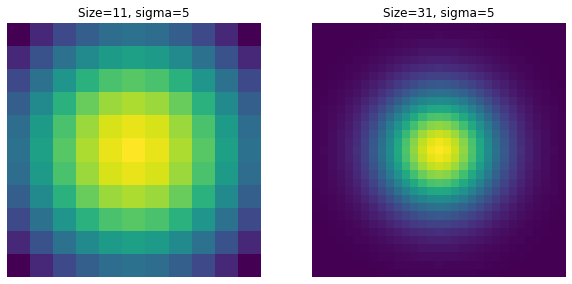

In [169]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(gaussian_2d(size=11, sigma=5)), plt.title('Size=11, sigma=5'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(gaussian_2d(size=31, sigma=5)), plt.title('Size=31, sigma=5'), plt.axis('off')
plt.show()

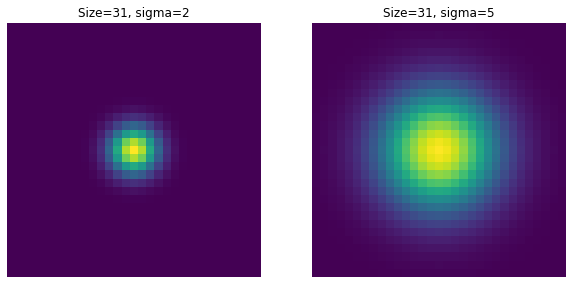

In [170]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(gaussian_2d(size=31, sigma=2)), plt.title('Size=31, sigma=2'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(gaussian_2d(size=31, sigma=5)), plt.title('Size=31, sigma=5'), plt.axis('off')
plt.show()

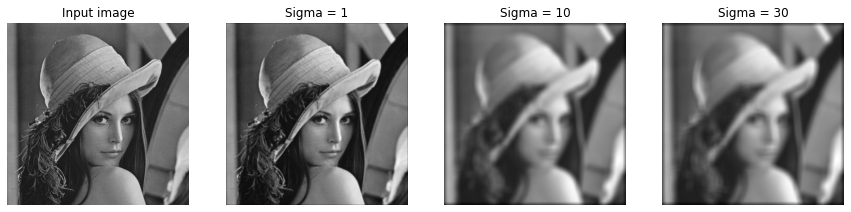

In [171]:
lena_gaussian_1 = conv_2d(lena_gs, gaussian_2d(size=21, sigma=1))
lena_gaussian_10 = conv_2d(lena_gs, gaussian_2d(size=21, sigma=10))
lena_gaussian_30 = conv_2d(lena_gs, gaussian_2d(size=21, sigma=30))
plt.figure(figsize=(15,10))
plt.subplot(1, 4, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image')
plt.subplot(1, 4, 2), plt.imshow(lena_gaussian_1, cmap=plt.cm.gray), plt.axis('off'), plt.title('Sigma = 1')
plt.subplot(1, 4, 3), plt.imshow(lena_gaussian_10, cmap=plt.cm.gray), plt.axis('off'), plt.title('Sigma = 10')
plt.subplot(1, 4, 4), plt.imshow(lena_gaussian_30, cmap=plt.cm.gray), plt.axis('off'), plt.title('Sigma = 30')
plt.show()

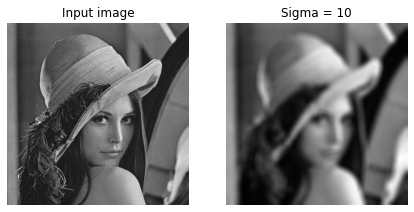

In [173]:
dst = cv2.GaussianBlur(lena_gs, (21,21), 10)
plt.figure(figsize=(15,10))
plt.subplot(1, 4, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image')
plt.subplot(1, 4, 2), plt.imshow(dst, cmap=plt.cm.gray), plt.axis('off'), plt.title('Sigma = 10')
plt.show()

# **Noise Removal**

In [174]:
def salt_pepper_noise(image, ratio, amount):
  
  row, col = image.shape
  output = np.copy(image)
  
  num_salt = np.ceil(amount * image.size * ratio)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  for i in zip(coords[0], coords[1]):
    output[i] = 255 # set to salt value

  num_pepper = np.ceil(amount * image.size * (1. - ratio))
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
  for i in zip(coords[0], coords[1]):
    output[i] = 0 # set to pepper value

  return output

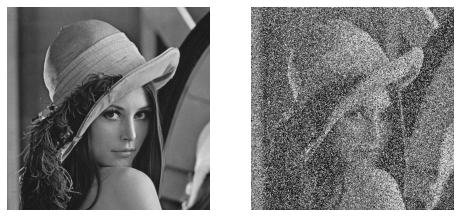

In [175]:
lena_salt_pepper = salt_pepper_noise(lena_gs, 0.6, 0.55)
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(lena_salt_pepper, cmap=plt.cm.gray), plt.axis('off')
plt.show()

#Median filter

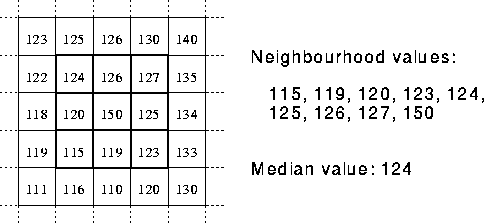

In [185]:
def median_filter(image, kernel_size, padding=True):

  image = np.asarray(image, dtype=np.float32)

  padding_size = (kernel_size - 1) // 2

  if padding:

    padded_image = np.pad(image, (padding_size, padding_size))

    output = np.zeros_like(image)

  else:

    padded_image = image

    output = np.zeros((image.shape[0] - 2 * padding_size, image.shape[1] - 2 * padding_size)) 

  
  for i in range(output.shape[0]):

    for j in range(output.shape[1]):

      output[i][j] = np.median(padded_image[i : i + kernel_size, j : j + kernel_size])

  return output

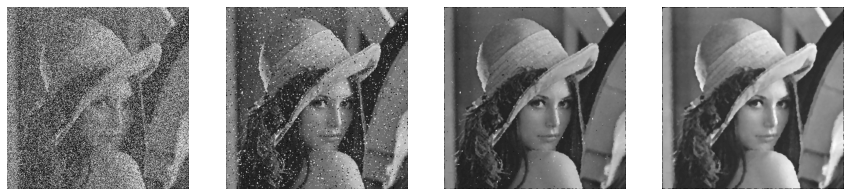

In [186]:
lena_median3 = median_filter(lena_salt_pepper, 3)
lena_median5 = median_filter(lena_salt_pepper, 5)
lena_median7 = median_filter(lena_salt_pepper, 7)
plt.figure(figsize=(15, 12))
plt.subplot(1, 4, 1), plt.imshow(lena_salt_pepper, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(lena_median3, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(lena_median5, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(lena_median7, cmap=plt.cm.gray), plt.axis('off')
plt.show()

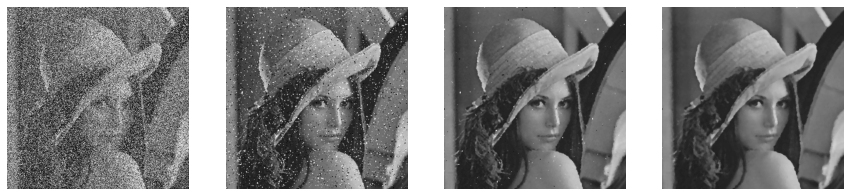

In [178]:
lena_median3_cv = cv2.medianBlur(lena_salt_pepper, 3)
lena_median5_cv = cv2.medianBlur(lena_salt_pepper, 5)
lena_median7_cv = cv2.medianBlur(lena_salt_pepper, 7)
plt.figure(figsize=(15, 12))
plt.subplot(1, 4, 1), plt.imshow(lena_salt_pepper, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(lena_median3_cv, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(lena_median5_cv, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(lena_median7_cv, cmap=plt.cm.gray), plt.axis('off')
plt.show()

In [179]:
print("Results checking...")
print("Difference (3x3 kernel): " + str(np.abs(lena_median3 - lena_median3_cv).sum()))
print("Difference (5x5 kernel): " + str(np.abs(lena_median5 - lena_median5_cv).sum()))
print("Difference (7x7 kernel): " + str(np.abs(lena_median7 - lena_median7_cv).sum()))

Results checking...
Difference (3x3 kernel): 59037.0
Difference (5x5 kernel): 123678.0
Difference (7x7 kernel): 194050.0


In [180]:
print("Results checking (without borders)...")
cropped_diff_3 = lena_median3[1:-1, 1:-1] - lena_median3_cv[1:-1, 1:-1]
cropped_diff_5 = lena_median5[2:-2, 2:-2] - lena_median5_cv[2:-2, 2:-2]
cropped_diff_7 = lena_median7[3:-3, 3:-3] - lena_median7_cv[3:-3, 3:-3]

print("Difference (3x3 kernel): " + str(np.abs(cropped_diff_3).sum()))
print("Difference (5x5 kernel): " + str(np.abs(cropped_diff_5).sum()))
print("Difference (7x7 kernel): " + str(np.abs(cropped_diff_7).sum()))

Results checking (without borders)...
Difference (3x3 kernel): 0.0
Difference (5x5 kernel): 0.0
Difference (7x7 kernel): 0.0


In [187]:
lena_salt_pepper_rep_b1 = cv2.copyMakeBorder(lena_salt_pepper, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
lena_salt_pepper_rep_b2 = cv2.copyMakeBorder(lena_salt_pepper, 2, 2, 2, 2, cv2.BORDER_REPLICATE)
lena_salt_pepper_rep_b3 = cv2.copyMakeBorder(lena_salt_pepper, 3, 3, 3, 3, cv2.BORDER_REPLICATE)

lena_median_rep_borders3 = median_filter(lena_salt_pepper_rep_b1, 3, padding=False)
lena_median_rep_borders5 = median_filter(lena_salt_pepper_rep_b2, 5, padding=False)
lena_median_rep_borders7 = median_filter(lena_salt_pepper_rep_b3, 7, padding=False)

diff_3 = lena_median_rep_borders3 - lena_median3_cv
diff_5 = lena_median_rep_borders5 - lena_median5_cv
diff_7 = lena_median_rep_borders7 - lena_median7_cv
print("Difference (3x3 kernel): " + str(np.abs(diff_3).sum()))
print("Difference (5x5 kernel): " + str(np.abs(diff_5).sum()))
print("Difference (7x7 kernel): " + str(np.abs(diff_7).sum()))

Difference (3x3 kernel): 0.0
Difference (5x5 kernel): 0.0
Difference (7x7 kernel): 0.0


# Filter2D function

In [188]:
kernel_size = 3

kernel_orig = np.zeros((kernel_size,kernel_size)) 
kernel_orig[1,1] = 1

kernel_shift = np.zeros((kernel_size, kernel_size))
kernel_shift[1,2] = 1

kernel_blur = 1/(kernel_size**2) * np.ones((kernel_size,kernel_size)) 

horizontal_blur = np.zeros((kernel_size,kernel_size))
horizontal_blur[1, :] = 1/kernel_size

vertical_blur = np.zeros((kernel_size,kernel_size))
vertical_blur[:, 1] = 1/kernel_size

print(f"No effect filter:\n{kernel_orig}\n\n")
print(f"Shift filter:\n{kernel_shift}\n\n")
print(f"Blur filter: \n{kernel_blur}\n\n")
print(f"Horizontal blur filter:\n{horizontal_blur}\n\n")
print(f"Vertical blur filter:\n{vertical_blur}\n\n")

No effect filter:
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


Shift filter:
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


Blur filter: 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Horizontal blur filter:
[[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.         0.        ]]


Vertical blur filter:
[[0.         0.33333333 0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.33333333 0.        ]]




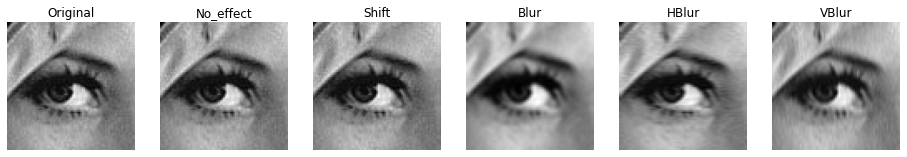

In [191]:
lena_cropped_gs = cv2.cvtColor(lena_cropped, cv2.COLOR_BGR2GRAY) # GS image

img_orig  = cv2.filter2D(lena_cropped_gs, -1, kernel_orig)
img_shift = cv2.filter2D(lena_cropped_gs, -1, kernel_shift)
img_blur  = cv2.filter2D(lena_cropped_gs, -1, kernel_blur)
img_hblur = cv2.filter2D(lena_cropped_gs, -1, horizontal_blur)
img_vblur = cv2.filter2D(lena_cropped_gs, -1, vertical_blur)

plt.figure(figsize=(16,14))
plt.subplot(1, 6, 1), plt.imshow(lena_cropped_gs, cmap=plt.cm.gray), plt.title('Original'), plt.axis('off')
plt.subplot(1, 6, 2), plt.imshow(img_orig, cmap=plt.cm.gray), plt.title('No_effect'),  plt.axis('off')
plt.subplot(1, 6, 3), plt.imshow(img_shift, cmap=plt.cm.gray), plt.title('Shift'),  plt.axis('off')
plt.subplot(1, 6, 4), plt.imshow(img_blur, cmap=plt.cm.gray), plt.title('Blur'),  plt.axis('off')
plt.subplot(1, 6, 5), plt.imshow(img_hblur, cmap=plt.cm.gray), plt.title('HBlur'),  plt.axis('off')
plt.subplot(1, 6, 6), plt.imshow(img_vblur, cmap=plt.cm.gray), plt.title('VBlur'),  plt.axis('off')
plt.show()

# Sharpening filter

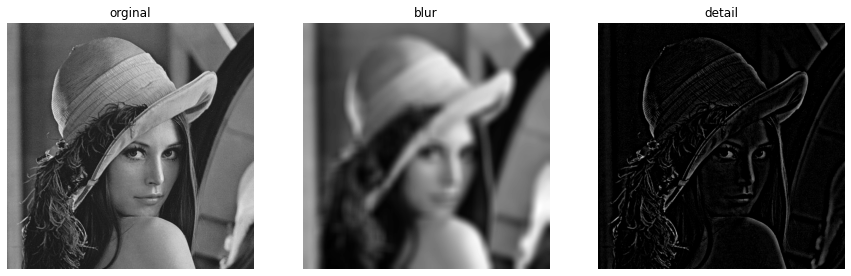

In [217]:
blur = cv2.GaussianBlur(lena_gs, (21,21), 10)

detail = cv2.addWeighted(lena_gs, 1, blur, -1, 0)

plt.figure(figsize=(15,12))

plt.subplot(1,3,1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off'), plt.title('orginal')
plt.subplot(1,3,2), plt.imshow(blur, cmap=plt.cm.gray), plt.axis('off'), plt.title('blur')
plt.subplot(1,3,3), plt.imshow(detail, cmap=plt.cm.gray), plt.axis('off'), plt.title('detail')

plt.show() 

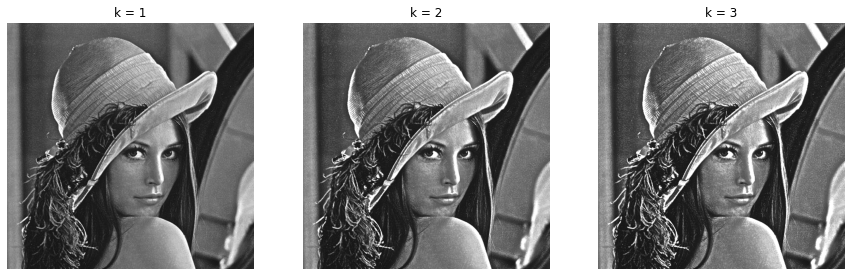

In [221]:
ks = [1, 2, 3]

plt.figure(figsize=(15,12))

for i, k in enumerate(ks):

  sharpen_version = cv2.addWeighted(lena_gs, 1, detail, k, 0)

  plt.subplot(1,len(ks),i+1), plt.imshow(sharpen_version, cmap=plt.cm.gray), plt.axis('off'),
  plt.title(f'k = {ks[i]}')

plt.show() 

#Contra-harmonic mean filter

The contra-harmonic mean filter is a non-linear mean filter typically used for removing several types of noise (e.g., Gaussian noise, salt&pepper noise, ...). It uses only one parameter (the filter order Q). 

Positive values of Q eliminate pepper noise, while negative values of Q eliminate salt noise.



\begin{equation}
\hat{f}(x, y) = \frac{\sum_{(s, t) \in S_{xy}} g(s,t)^{Q+1}}{\sum_{(s, t) \in S_{xy}} g(s,t)^Q}
\end{equation}

In [223]:
def contraharmonic_mean(image, kernel_size, Q):

  num = np.power(image, Q + 1)
  denom = np.power(image, Q)
  
  kernel = np.full(kernel_size, 1.0)
  
  result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
  return result

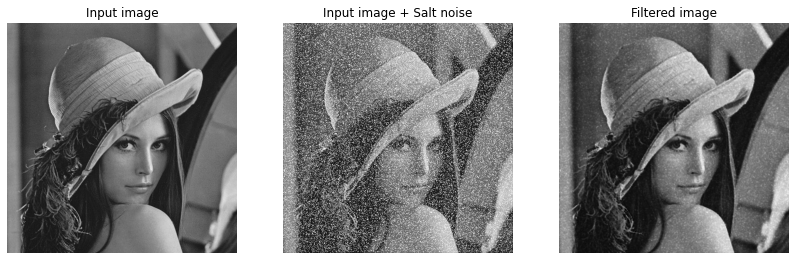

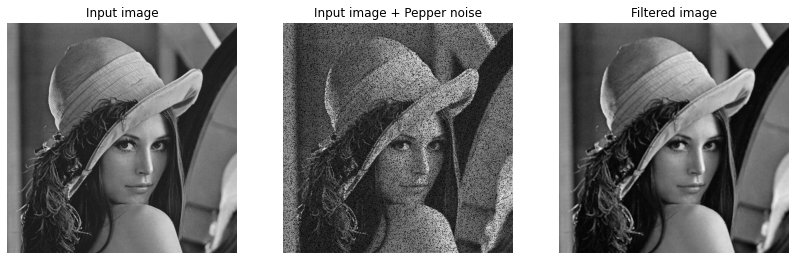

In [224]:
plt.figure(figsize=(14,10))

lena_noisy_salt = salt_pepper_noise(lena_gs, 1, 0.2)
plt.subplot(1,3,1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.title('Input image'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lena_noisy_salt, cmap=plt.cm.gray), plt.title('Input image + Salt noise'), plt.axis('off')

filtered_lena_noisy_salt = contraharmonic_mean(lena_noisy_salt, (3,3), -1.5)
plt.subplot(1,3,3), plt.imshow(filtered_lena_noisy_salt, cmap=plt.cm.gray), plt.title('Filtered image'), plt.axis('off')
plt.show()

plt.figure(figsize=(14,10))

lena_noisy_pepper = salt_pepper_noise(lena_gs, 0, 0.2)
plt.subplot(1,3,1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.title('Input image'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lena_noisy_pepper, cmap=plt.cm.gray), plt.title('Input image + Pepper noise'), plt.axis('off')

filtered_lena_noisy_pepper = contraharmonic_mean(lena_noisy_pepper, (3,3), 1.5)
plt.subplot(1,3,3), plt.imshow(filtered_lena_noisy_pepper, cmap=plt.cm.gray), plt.title('Filtered image'), plt.axis('off')
plt.show()